#### McKenzie Steenson
#### CS 334
#### HW5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from math import exp

In [2]:
df = pd.read_csv('weather.csv')

df.head(5)

,STATION,NAME,DATE,Avg Daily Wind Speed,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT06,WT08
0,USW00024131,"BOISE AIR TERMINAL, ID US",3/21/2020,6.04,NaN,NaN,NaN,0.00,0.0,0.0,...,320.0,340.0,16.1,21.9,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00024131,"BOISE AIR TERMINAL, ID US",3/22/2020,5.82,NaN,NaN,NaN,0.00,0.0,0.0,...,360.0,360.0,15.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00024131,"BOISE AIR TERMINAL, ID US",3/23/2020,9.62,NaN,NaN,NaN,0.05,0.0,0.0,...,280.0,270.0,29.1,38.0,NaN,NaN,NaN,NaN,NaN,1.0
3,USW00024131,"BOISE AIR TERMINAL, ID US",3/24/2020,6.71,NaN,NaN,NaN,0.07,0.0,0.0,...,290.0,300.0,21.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00024131,"BOISE AIR TERMINAL, ID US",3/25/2020,7.83,NaN,NaN,NaN,0.01,0.0,0.0,...,310.0,310.0,21.0,29.1,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# DAPR, MDPR, PGTM, SNWD and TOBS-WT08 columns to be dropped!
df = df.drop(['DAPR', 'MDPR', 'PGTM', 'SNWD'], axis=1)
df = df.drop(df.loc[:, 'TOBS':'WT08'].columns, axis=1)

In [4]:
# The data has plenty of duplicates, must remove those too!
df = df.drop(df.index[541:9716])

In [5]:
df

,STATION,NAME,DATE,Avg Daily Wind Speed,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00024131,"BOISE AIR TERMINAL, ID US",3/21/2020,6.04,0.00,0.0,48.0,59.0,36.0
1,USW00024131,"BOISE AIR TERMINAL, ID US",3/22/2020,5.82,0.00,0.0,46.0,60.0,33.0
2,USW00024131,"BOISE AIR TERMINAL, ID US",3/23/2020,9.62,0.05,0.0,50.0,57.0,43.0
3,USW00024131,"BOISE AIR TERMINAL, ID US",3/24/2020,6.71,0.07,0.0,45.0,49.0,36.0
4,USW00024131,"BOISE AIR TERMINAL, ID US",3/25/2020,7.83,0.01,0.0,40.0,49.0,32.0
...,...,...,...,...,...,...,...,...,...
537,USW00024131,"BOISE AIR TERMINAL, ID US",9/9/2021,6.26,0.00,0.0,78.0,98.0,64.0
538,USW00024131,"BOISE AIR TERMINAL, ID US",9/10/2021,6.71,0.11,0.0,76.0,78.0,55.0
539,USW00024131,"BOISE AIR TERMINAL, ID US",9/11/2021,NaN,NaN,NaN,62.0,NaN,NaN
540,US1IDAD0021,"BOISE CITY 6.1 SE, ID US",3/21/2020,NaN,0.00,0.0,NaN,NaN,NaN


In [6]:
# Change the string dates ('3/21/2020') into datetime objects!
def string_to_date(date_string):
    return datetime.strptime(date_string,'%m/%d/%Y')

In [7]:
df['DATE'] = df['DATE'].apply(string_to_date)

In [15]:
# Add a column indicating if there was percipitation that day! (0 = no rain, 1 = rain)
df['RAIN'] = ""
df.loc[df['PRCP'] == 0.00, "RAIN"] = int(0)
df.loc[df['PRCP'] > 0.00, "RAIN"] = int(1)

In [16]:
# Fill NaN values
df.fillna(df.mean(), inplace=True)

C:\Users\mcken\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


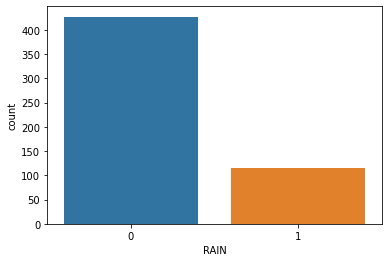

In [17]:
ax = sns.countplot(x="RAIN", data=df) # Rain vs No Rain (lots of days in Boise without Rain)

In [18]:
df

,STATION,NAME,DATE,Avg Daily Wind Speed,PRCP,SNOW,TAVG,TMAX,TMIN,RAIN
0,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-21,6.040000,0.000000,0.000000,48.000000,59.000000,36.000000,0
1,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-22,5.820000,0.000000,0.000000,46.000000,60.000000,33.000000,0
2,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-23,9.620000,0.050000,0.000000,50.000000,57.000000,43.000000,1
3,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-24,6.710000,0.070000,0.000000,45.000000,49.000000,36.000000,1
4,USW00024131,"BOISE AIR TERMINAL, ID US",2020-03-25,7.830000,0.010000,0.000000,40.000000,49.000000,32.000000,1
...,...,...,...,...,...,...,...,...,...,...
537,USW00024131,"BOISE AIR TERMINAL, ID US",2021-09-09,6.260000,0.000000,0.000000,78.000000,98.000000,64.000000,0
538,USW00024131,"BOISE AIR TERMINAL, ID US",2021-09-10,6.710000,0.110000,0.000000,76.000000,78.000000,55.000000,1
539,USW00024131,"BOISE AIR TERMINAL, ID US",2021-09-11,7.509369,0.032625,0.039259,62.000000,70.606679,45.959184,1
540,US1IDAD0021,"BOISE CITY 6.1 SE, ID US",2020-03-21,7.509369,0.000000,0.000000,58.155556,70.606679,45.959184,0


In [19]:
feature_cols = ['Avg Daily Wind Speed', 'SNOW', 'TAVG','TMAX','TMIN']
X = df[feature_cols] # Features
y = df['RAIN'] # Target variable

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [21]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [22]:
X_test.head(15)

,Avg Daily Wind Speed,SNOW,TAVG,TMAX,TMIN
6,6.04,0.0,38.0,50.0,26.0
47,5.82,0.0,51.0,66.0,34.0
336,8.50,0.2,35.0,41.0,30.0
392,6.49,0.0,53.0,67.0,39.0
213,5.82,0.0,54.0,62.0,45.0
39,9.40,0.0,66.0,88.0,53.0
200,4.47,0.0,65.0,82.0,50.0
305,5.37,0.0,31.0,44.0,23.0
274,10.07,0.0,42.0,46.0,39.0
442,9.62,0.0,65.0,77.0,49.0


In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9338235294117647


In [24]:
# [['Avg Daily Wind Speed', 'SNOW', 'TAVG','TMAX','TMIN']]
# a new prediction!
new_day = [['10.20', '0.00', '42.0','50.0','32.0']]

In [25]:
prediction = logreg.predict(new_day)

C:\Users\mcken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [26]:
prediction[0]

0

In [27]:
# a new prediction, but with more snow?
new_day = [['10.20', '2.5', '22.0','50.0','32.0']]
prediction = logreg.predict(new_day)
prediction[0]

C:\Users\mcken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


1

### My model does seem to be better than a wild guess!Snow, wind speed, and the minimum daily temperature are the most influential indicators of wether or not it will rain on any given day in Boise. As the temperature increases, indicated by the TMAX, it indicates that as a negative influencer on percipitation on any day. My model recieved an accuracy score of 93%, which is surprisingly high when considering only snow, temperatures, and wind speeds.

## Improving My Model! (beginning of hw5)

### Cutting out the noise
#### dropping percipitation/date/station/name column

#### snow is considered percipitation, so that column must go as well!

In [28]:
df_clean = df.drop(['STATION', 'NAME', 'DATE', 'NAME', 'PRCP', 'SNOW'], axis=1)

In [29]:
# Now lets retrain with the noise 'cut out'
feature_cols = ['Avg Daily Wind Speed', 'TAVG','TMAX','TMIN']
X = df_clean[feature_cols] # Features
y = df_clean['RAIN'] # Target variable

In [30]:
df_clean.head()

,Avg Daily Wind Speed,TAVG,TMAX,TMIN,RAIN
0,6.04,48.0,59.0,36.0,0
1,5.82,46.0,60.0,33.0,0
2,9.62,50.0,57.0,43.0,1
3,6.71,45.0,49.0,36.0,1
4,7.83,40.0,49.0,32.0,1


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [32]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [33]:
X_test.head(15)

,Avg Daily Wind Speed,TAVG,TMAX,TMIN
6,6.04,38.0,50.0,26.0
47,5.82,51.0,66.0,34.0
336,8.50,35.0,41.0,30.0
392,6.49,53.0,67.0,39.0
213,5.82,54.0,62.0,45.0
39,9.40,66.0,88.0,53.0
200,4.47,65.0,82.0,50.0
305,5.37,31.0,44.0,23.0
274,10.07,42.0,46.0,39.0
442,9.62,65.0,77.0,49.0


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9338235294117647


### Interesting... the accuracy stayed just about the same as before with the other columns dropped...

In [35]:
# [['Avg Daily Wind Speed', 'TAVG','TMAX','TMIN']]
# a new prediction!
new_day = [['10.20', '42.0','50.0','32.0']]

In [36]:
prediction = logreg.predict(new_day)

C:\Users\mcken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [37]:
prediction[0]

0

### Deriving New Data

##### awnd = average daily wind speed
##### wdf2 = directionof fastest 2-minute wind (degrees) 
##### SSW -NNW = 191.25 - 348.74

#### With this new data, I am not adding columns, but I went back and got information about the wind. AWND describes the average daily wind speed and WDF2 describes the direction of the fastest 2-minute wind in degrees. We can assume that percipitation is brought to Boise from the Ocean from the West, so once we are able to change the WDF2 degrees to their respective cardinal directions, this signal can be implemented into our model

In [83]:
df_boise = pd.read_csv('boise_weather.csv')

df_boise.head(5)

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2
0,USW00024131,"BOISE AIR TERMINAL, ID US",10/2/2020,5.14,0.0,0.0,66,84.0,51.0,150.0
1,USW00024131,"BOISE AIR TERMINAL, ID US",10/3/2020,5.37,0.0,0.0,67,83.0,53.0,130.0
2,USW00024131,"BOISE AIR TERMINAL, ID US",10/4/2020,5.59,0.0,0.0,66,81.0,47.0,130.0
3,USW00024131,"BOISE AIR TERMINAL, ID US",10/5/2020,5.82,0.0,0.0,63,81.0,49.0,320.0
4,USW00024131,"BOISE AIR TERMINAL, ID US",10/6/2020,6.26,0.0,0.0,65,82.0,52.0,130.0


In [84]:
# function found @ https://gist.github.com/RobertSudwarts/acf8df23a16afdb5837f to change degrees to cardinal direction
def degrees_to_cardinal(d):
    dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    ix = round(d / (360. / len(dirs)))
    return dirs[ix % len(dirs)]

In [85]:
df_boise = df_boise.dropna()

In [86]:
df_boise['WIND_DIRECTION'] = df_boise['WDF2'].apply(lambda x: degrees_to_cardinal(x))

In [87]:
# add our rain flag column
df_boise['RAIN'] = ""
df_boise.loc[df_boise['PRCP'] == 0.00, "RAIN"] = int(0)
df_boise.loc[df_boise['PRCP'] > 0.00, "RAIN"] = int(1)

In [88]:
# now to drop the unneccesary columns
df_boise = df_boise.drop(['STATION', 'NAME', 'DATE', 'NAME', 'PRCP', 'SNOW'], axis=1)

In [89]:
df_boise.head(5)

,AWND,TAVG,TMAX,TMIN,WDF2,WIND_DIRECTION,RAIN
0,5.14,66,84.0,51.0,150.0,SSE,0
1,5.37,67,83.0,53.0,130.0,SE,0
2,5.59,66,81.0,47.0,130.0,SE,0
3,5.82,63,81.0,49.0,320.0,NW,0
4,6.26,65,82.0,52.0,130.0,SE,0


In [90]:
### Let's see what messing with some data from Seattle can do! I will have clean up the Seattle data and then include the seattle percipitation data in the boise dataframe!

In [91]:
df_seattle = pd.read_csv('seattle.csv')

In [92]:
# dropping the first two rows in the boise dataframe to offset the dates... a hack job!
df_boise = df_boise.iloc[2: , :]

In [93]:
df_boise['SEATTLE_RAIN']= df_seattle['Column6']

In [94]:
df_boise = df_boise.dropna()

In [98]:
feature_cols = ['AWND', 'TAVG','TMAX','TMIN','SEATTLE_RAIN']
X = df_boise[feature_cols] # Features
y = df_boise['RAIN'] # Target variable
y = y.astype('int')

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [100]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8876404494382022


### Some evaluation!

In [102]:
# Import Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np
confusion_matrix(y_test, y_pred)
np.array(list(zip(y_test,y_pred)))


array([[0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

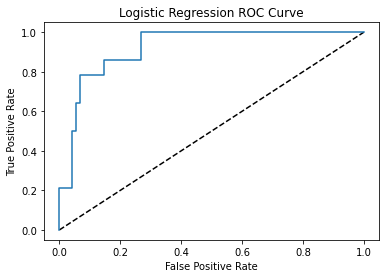

In [104]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [105]:
# This uses an integral
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9228571428571429

In [106]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6153846153846153

### Well as we can see here, including the data from Seattle didn't seem to help at all. Seattle must be too far up north! But this accuracy seems to be more reasonable for the model that I have created compared to the above 93% accuracy score that the previous model had recieved. 

### Transforming the Data

### Okay, lets try to transform some of the data utilizing the MinMaxScaler provided by the toolkit

In [107]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [108]:
df_boise_scaled = df_boise.copy()
df_boise_scaled[["TAVG", "TMAX", "TMIN"]] = min_max_scaler.fit_transform(df_boise_scaled[["TAVG", "TMAX", "TMIN"]])

In [109]:
feature_cols = ['AWND', 'TAVG','TMAX','TMIN', 'SEATTLE_RAIN']
X = df_boise_scaled[feature_cols] # Features
y = df_boise['RAIN'] # Target variable
y = y.astype('int')

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [111]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8314606741573034


### Interesting, the scaling of the temperatures did not improve the accuracy at all, it actually really decreased it!

### Let's try the standard scaler instead

In [113]:
from sklearn.preprocessing import StandardScaler

df_boise_scaled = df_boise.copy()
df_boise_scaled[["TAVG", "TMAX", "TMIN"]] = min_max_scaler.fit_transform(df_boise_scaled[["TAVG", "TMAX", "TMIN"]])

In [115]:
feature_cols = ['AWND', 'TAVG','TMAX','TMIN', 'SEATTLE_RAIN']
X = df_boise_scaled[feature_cols] # Features
y = df_boise['RAIN'] # Target variable
y = y.astype('int')

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [117]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8314606741573034


### Same outcome as before, maybe scaling isnt the answer for the data

### I would also like to utilize label-encoding on our wind direction!

In [119]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_boise['WIND_DIRECTION'])
# Drop column B as it is now encoded
df = df_boise.drop('WIND_DIRECTION',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [120]:
df.head()

,AWND,TAVG,TMAX,TMIN,WDF2,RAIN,SEATTLE_RAIN,E,ESE,N,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
2,5.59,66,81.0,47.0,130.0,0,0.04,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5.82,63,81.0,49.0,320.0,0,0.00,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,6.26,65,82.0,52.0,130.0,0,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,4.47,65,82.0,50.0,130.0,0,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,6.04,64,80.0,51.0,140.0,0,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [121]:
X = df[df.columns.difference(['RAIN'])]# Features
y = df_boise['RAIN'] # Target variable
y = y.astype('int')

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [123]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9101123595505618


In [125]:
confusion_matrix(y_test, y_pred)

array([[72,  3],
       [ 5,  9]], dtype=int64)

In [126]:
np.array(list(zip(y_test.to_numpy(),y_pred)))

array([[0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

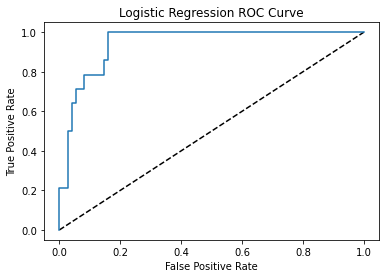

In [127]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [128]:
roc_auc_score(y_test, y_pred_prob)

0.9438095238095238

In [129]:
f1_score(y_test, y_pred)

0.6923076923076924

### This improved the accuracy! Woohoo! I still cannot seem to understand why the first accuracy score was around 93%, but this 91% accuracy seems like a reasonable goal for a model with the amount of rows and columns provided with some feature engineering and included information from Seattle! Every other evalutaion metric was improved, especially that f1_score. Compared to the 83% after scaling, the 91% is m